<a href="https://colab.research.google.com/github/HarikaDevi23/DATA_SCIENCE/blob/main/Assignment1_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2: Data Visualization for Student Performance

Overview

For the student performance dataset (download from the provided link and saved as student_performance.csv), we are to create five distinct visualizations.

Each visualization helps us answer specific questions:

Histogram of Math Scores:

Shows the distribution of math scores, highlighting central tendency and spread.

Box Plot of Reading Scores by Gender:

Compares reading score distributions between male and female students.

Scatter Plot of Math vs. Reading Scores:

Examines the relationship (correlation) between math and reading scores.

Bar Chart of Average Writing Score by Parental Education:

Reveals how parental education level might impact writing scores.

Pair Plot of Test Scores:

Visualizes pairwise relationships among math, reading, and writing scores.

Folder Structure

A suggested folder layout for the “Student_Performance_Analysis” might be:

Student_Performance_Analysis/

├── data/

│ └── raw/

│ └── student_performance.csv

├── src/

│ └── visualization.py

├── results/

│ ├── histogram_math_scores.png

│ ├── boxplot_reading_scores.png

│ ├── scatter_math_vs_reading.png

│ ├── bar_avg_writing_by_parent_edu.png

│ └── pairplot_test_scores.png

In [5]:
import os

base_dir = "Student_Performance_Analysis"
data_dir = os.path.join(base_dir, "data")
raw_dir = os.path.join(data_dir, "raw")

os.makedirs(raw_dir, exist_ok=True)
print(f"Folder structure created at: /content/{raw_dir}")

Folder structure created at: /content/Student_Performance_Analysis/data/raw


In [6]:
from google.colab import files
import shutil

# Upload the file (a widget will appear; choose student_performance.csv)
uploaded = files.upload()

# Check if the file is uploaded and move it to the raw folder
if "student_performance.csv" in uploaded:
    shutil.move("student_performance.csv", os.path.join(raw_dir, "student_performance.csv"))
    print("File moved to:", os.path.join(raw_dir, "student_performance.csv"))
else:
    print("Upload failed or file not found. Please try again.")

Saving student_performance.csv to student_performance.csv
File moved to: Student_Performance_Analysis/data/raw/student_performance.csv


In [7]:
import pandas as pd

csv_file = os.path.join(raw_dir, "student_performance.csv")
df = pd.read_csv(csv_file)
print("Dataset loaded successfully:")
print(df.head())

Dataset loaded successfully:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


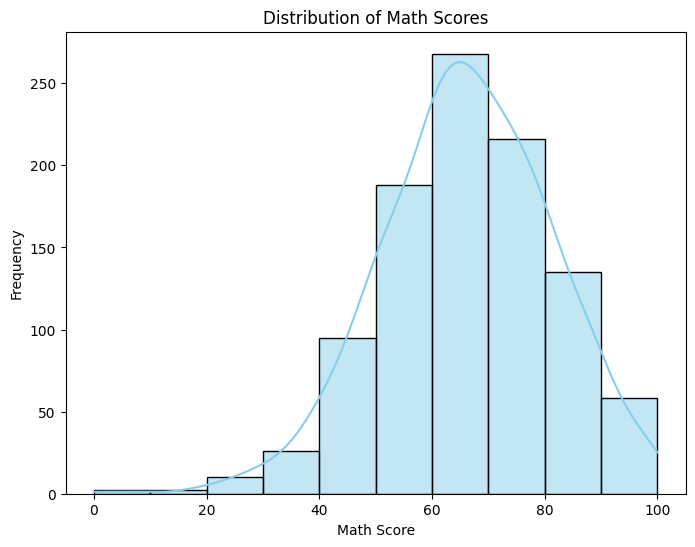


Histogram of Math Scores



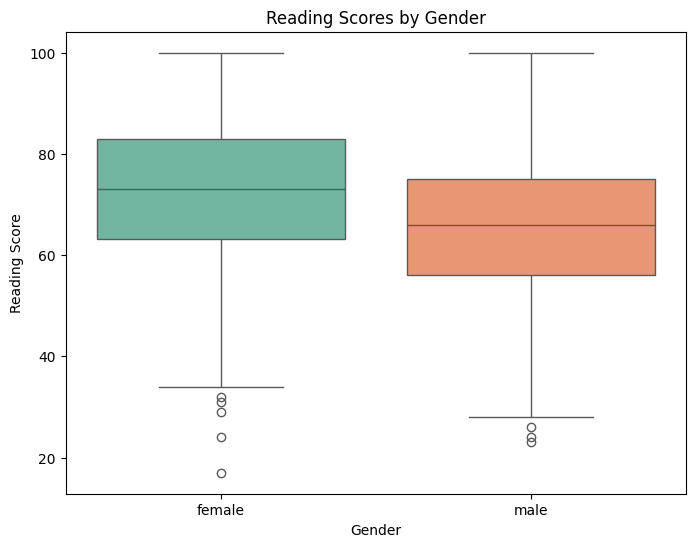


Box Plot of Reading Scores by Gender



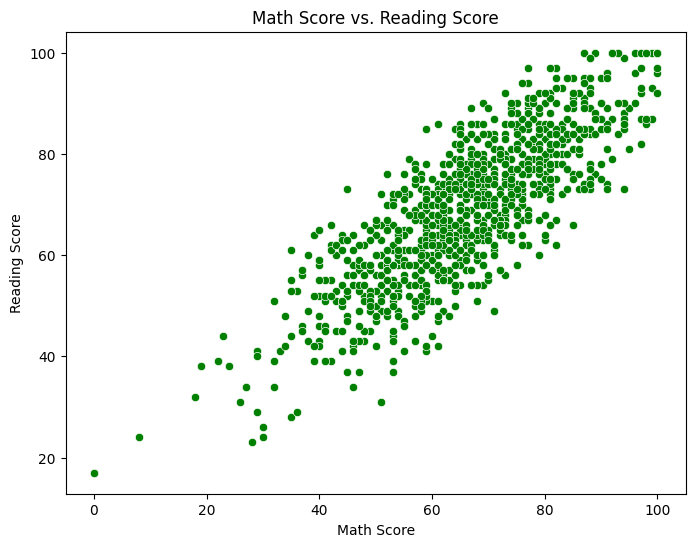


Scatter Plot of Math Score vs. Reading Score



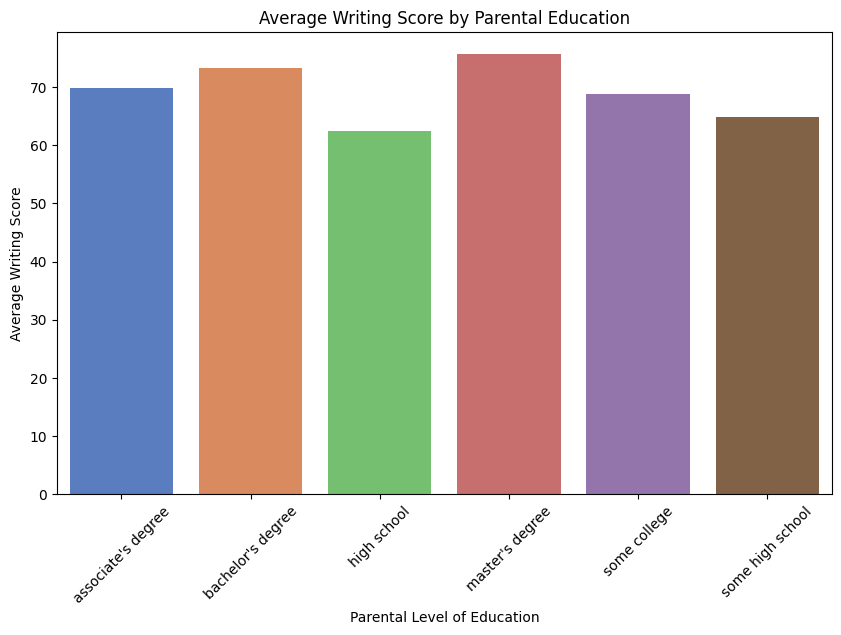


Bar Chart of Average Writing Score by Parental Education



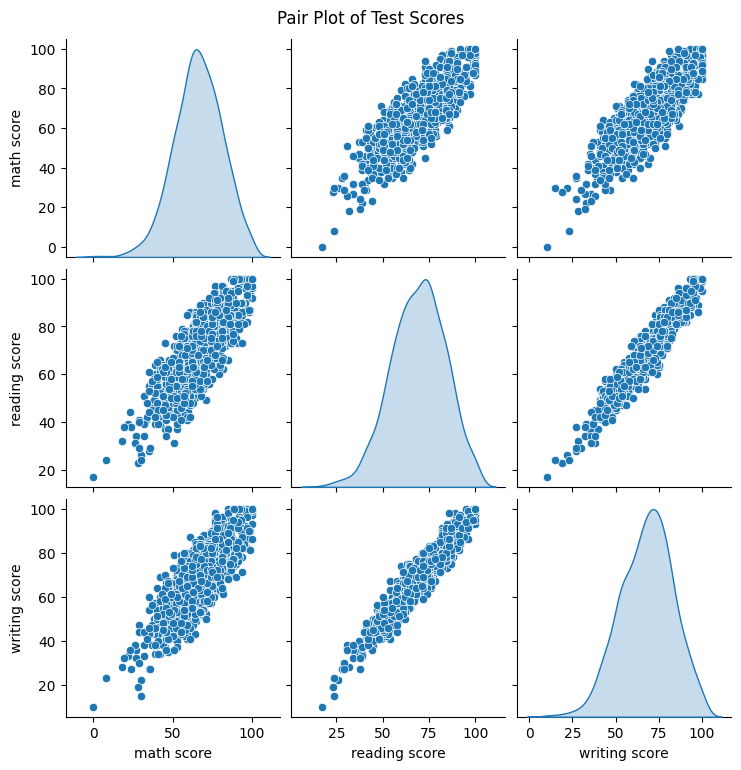


Pair Plot of Test Scores



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create results directory
os.makedirs("results", exist_ok=True)

# Load the student performance dataset
df = pd.read_csv("Student_Performance_Analysis/data/raw/student_performance.csv")

# 1. Histogram of Math Scores
plt.figure(figsize=(8,6))
sns.histplot(df['math score'], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.savefig("results/histogram_math_scores.png")
plt.show()      # Display the plot inline
plt.close()
print("\nHistogram of Math Scores\n")

# 2. Box Plot of Reading Scores by Gender
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='gender', y='reading score', data=df, hue='gender', palette="Set2")
legend = ax.get_legend()
if legend is not None:
    legend.remove()
plt.title("Reading Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Reading Score")
plt.savefig("results/boxplot_reading_scores.png")
plt.show()      # Display the plot inline
plt.close()
print("\nBox Plot of Reading Scores by Gender\n")

# 3. Scatter Plot of Math Score vs. Reading Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='math score', y='reading score', data=df, color="green")
plt.title("Math Score vs. Reading Score")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.savefig("results/scatter_math_vs_reading.png")
plt.show()      # Display the plot inline
plt.close()
print("\nScatter Plot of Math Score vs. Reading Score\n")

# 4. Bar Chart of Average Writing Score by Parental Level of Education
plt.figure(figsize=(10,6))
avg_writing = df.groupby('parental level of education')['writing score'].mean().reset_index()
ax = sns.barplot(x='parental level of education', y='writing score',
                 data=avg_writing, hue='parental level of education', palette="muted")
legend = ax.get_legend()
if legend is not None:
    legend.remove()
plt.title("Average Writing Score by Parental Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Writing Score")
plt.xticks(rotation=45)
plt.savefig("results/bar_avg_writing_by_parent_edu.png")
plt.show()      # Display the plot inline
plt.close()
print("\nBar Chart of Average Writing Score by Parental Education\n")

# 5. Pair Plot for All Test Scores
g = sns.pairplot(df[['math score', 'reading score', 'writing score']], diag_kind="kde")
g.fig.suptitle("Pair Plot of Test Scores", y=1.02)
g.savefig("results/pairplot_test_scores.png")
plt.show()      # Display the pair plot inline
plt.close()
print("\nPair Plot of Test Scores\n")


Histogram of Math Scores

This shows us how student's math scores are spread out. We can see if most scores cluster around a certain value (like 60), whether the distribution is fairly symmetrical, and if there are any extreme high or low scores. It's a quick way to see the overall shape and “average” range of math performance.

Box Plot of Reading Scores by Gender

This helps compare reading performance between female and male students at a glance. The box's position shows us the middle range of scores, the line in the box shows the median score, and the “whiskers” and dots reveal any very high or low outliers. We can immediately see if one group tends to have higher or lower scores than the other.

Scatter Plot of Math Score vs. Reading Score

This shows whether students who do well in math also tend to do well in reading. If the points form a pattern slanting upward, that suggests a positive relationship: as math scores go up, reading scores also go up. It's an easy way to check how closely these two scores track each other.

Bar Chart of Average Writing Score by Parental Education

This lets us compare the average writing scores for students whose parents have different levels of education. Each bar shows the average score for a particular education level, so we can quickly spot which group has the highest or lowest writing scores. It's a straightforward way to see if parental education might influence student writing performance.

Pair Plot of Math, Reading, and Writing Scores

A pair plot gives us all the scatter plots (math vs. reading, reading vs. writing, and math vs. writing) plus the distribution of each score on the diagonal. This makes it very easy to spot which subjects are most closely related and to see how each score is distributed by itself. It's a one-stop view for understanding all the relationships among the three test scores. Overall, these visualizations make it much simpler to spot trends, compare groups, and see relationships in the data than if we were just looking at tables of numbers.

